# **17次元の変数で表されるデータを2次元で表現する（次元削減）**

TaSi<sub>17</sub>クラスターの構造異性体95種(EQ0～EQ94)に関するエネルギー(Energy)とTa-Si核間距離(R1～R17)のデータがcsvファイルにまとめられています。

17次元の変数で表されるクラスター構造の情報を「主成分分析(PCA)」を用いて2次元に削減し、95個のデータを2次元平面にプロットしましょう。

TaSi17.csvファイルはこちらから取得できます。
https://github.com/hatanaka-lab/Getting_started_with_MI/blob/main/data/TaSi17.csv



In [1]:
#必要そうなライブラリたちをインポート
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#matplotlibで作成する図の中に日本語のフォントを利用する場合はこちらもインポート
!pip install japanize-matplotlib
import japanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 23.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=f966096efcf37e3919b26373b62a401823e445958da4d8dd917763ac87e24c16
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


# **STEP1：データの読み込み**

ファイルをアップロードする方法：

 ①Google Colab画面左側の『ファイル』ボタンをクリックし、ファイルをdrag-and-dropする。(推奨)

 ②下記コードを実行し、『ファイル選択』ボタンでファイルを指定する。

In [3]:
#ファイルのアップロード方法②を使う場合は、下記2行の#を削除すること。
#from google.colab import files
#files.upload()

In [5]:
#csvファイルの中身を「df」に代入
## dfは"data frame"の略。
## pythonでは、data frameとarrayの2種類をよく使うので、どちらか混乱しないように、data frameには『df』や『df_XXX』と名前を付ける癖をつけよう
df = pd.read_csv('TaSi17.csv')

# dfの中身を確認①
# 各列の名前やﾃﾞｰﾀの個数（ぬけがないか等々）をcheck
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   EQ_ID   95 non-null     object 
 1   Energy  95 non-null     float64
 2   R1      95 non-null     float64
 3   R2      95 non-null     float64
 4   R3      95 non-null     float64
 5   R4      95 non-null     float64
 6   R5      95 non-null     float64
 7   R6      95 non-null     float64
 8   R7      95 non-null     float64
 9   R8      95 non-null     float64
 10  R9      95 non-null     float64
 11  R10     95 non-null     float64
 12  R11     95 non-null     float64
 13  R12     95 non-null     float64
 14  R13     95 non-null     float64
 15  R14     95 non-null     float64
 16  R15     95 non-null     float64
 17  R16     95 non-null     float64
 18  R17     95 non-null     float64
dtypes: float64(18), object(1)
memory usage: 14.2+ KB


In [6]:
#dfの中身を確認②
# ﾃﾞｰﾀを上から2行だけ見てみる head(XX)のXXの数で表示する行数を指定
df.head(2)

,EQ_ID,Energy,R1,R2,R3,R4,R5,R6,R7,R8,R9,R10,R11,R12,R13,R14,R15,R16,R17
0,EQ0,-1.492153,2.01750,2.01752,2.03169,2.04463,2.04466,2.04477,2.04479,2.06911,2.06916,2.12788,2.12829,2.33559,2.33559,2.33581,2.33582,2.4871,2.48712
1,EQ1,-1.485933,1.98924,1.98925,1.99424,1.99426,2.00639,2.00641,2.09846,2.15598,2.16044,2.16335,2.26483,2.30243,2.30270,2.32711,2.32717,2.3596,2.35962


# **STEP2：不要データの削除**

In [7]:
# dfの中の『R1』～『R17』の列だけを説明変数(入力)に用いたい
# つまり、『EQ_ID』と『Energy』の列を削除すれば良い
# 列を削除したdfを別名のデータフレーム(df_dist)に代入する前に、正しくデータを削除できているか確認しよう
df.drop(columns=['EQ_ID','Energy']).head(2)

,R1,R2,R3,R4,R5,R6,R7,R8,R9,R10,R11,R12,R13,R14,R15,R16,R17
0,2.01750,2.01752,2.03169,2.04463,2.04466,2.04477,2.04479,2.06911,2.06916,2.12788,2.12829,2.33559,2.33559,2.33581,2.33582,2.4871,2.48712
1,1.98924,1.98925,1.99424,1.99426,2.00639,2.00641,2.09846,2.15598,2.16044,2.16335,2.26483,2.30243,2.30270,2.32711,2.32717,2.3596,2.35962


In [8]:
#核間距離(『R1』～『R17』)のみを取り出して、"df_dist"というデータフレームに代入
df_dist=df.drop(columns=['EQ_ID','Energy'])

#df_distの中身を確認
# ﾃﾞｰﾀを上から2行だけ見てみる
df_dist.head(2)

,R1,R2,R3,R4,R5,R6,R7,R8,R9,R10,R11,R12,R13,R14,R15,R16,R17
0,2.01750,2.01752,2.03169,2.04463,2.04466,2.04477,2.04479,2.06911,2.06916,2.12788,2.12829,2.33559,2.33559,2.33581,2.33582,2.4871,2.48712
1,1.98924,1.98925,1.99424,1.99426,2.00639,2.00641,2.09846,2.15598,2.16044,2.16335,2.26483,2.30243,2.30270,2.32711,2.32717,2.3596,2.35962


In [9]:
#『EQ_ID』の列だけ削除したデータフレーム"df_Target"も定義する（STEP3のデータの観察用に）
df_Target = df.drop(columns='EQ_ID')
# 正しく指定できたか確認
df_Target.head(2)

,Energy,R1,R2,R3,R4,R5,R6,R7,R8,R9,R10,R11,R12,R13,R14,R15,R16,R17
0,-1.492153,2.01750,2.01752,2.03169,2.04463,2.04466,2.04477,2.04479,2.06911,2.06916,2.12788,2.12829,2.33559,2.33559,2.33581,2.33582,2.4871,2.48712
1,-1.485933,1.98924,1.98925,1.99424,1.99426,2.00639,2.00641,2.09846,2.15598,2.16044,2.16335,2.26483,2.30243,2.30270,2.32711,2.32717,2.3596,2.35962


In [10]:
##おまけ df.iloc[:,2:].head(2)  行・列の数を指定して削除することも可(2列目以降をすべて取り出すという意味)

# **STEP3：データの観察**

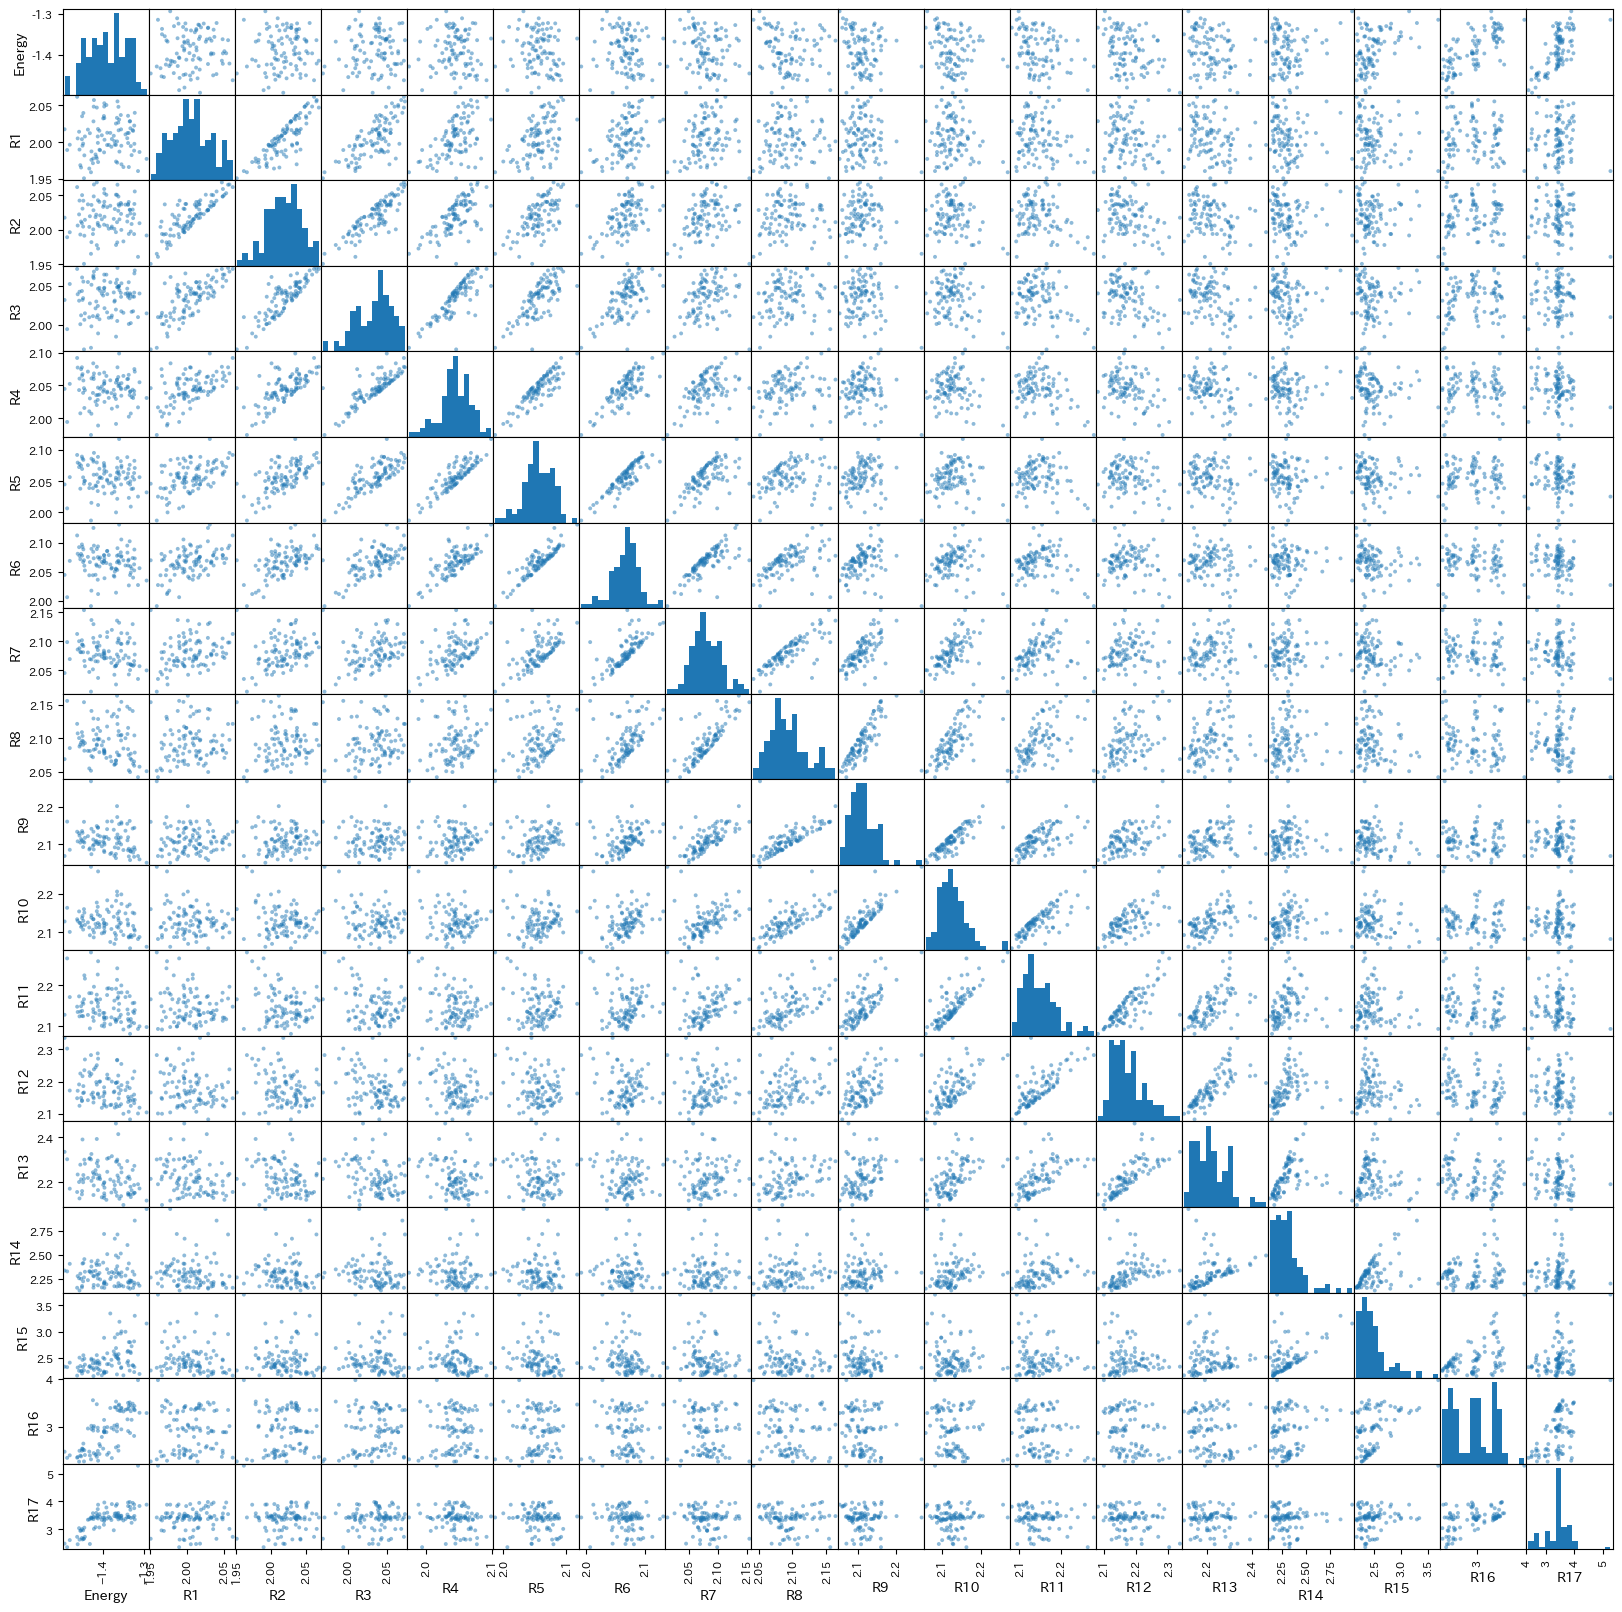

In [11]:
# データの分布を観察する：その1
pd.plotting.scatter_matrix(df_Target, figsize=(20, 20), hist_kwds={'bins':15},
                           marker=('o'), s=8, alpha=.5)
plt.show()

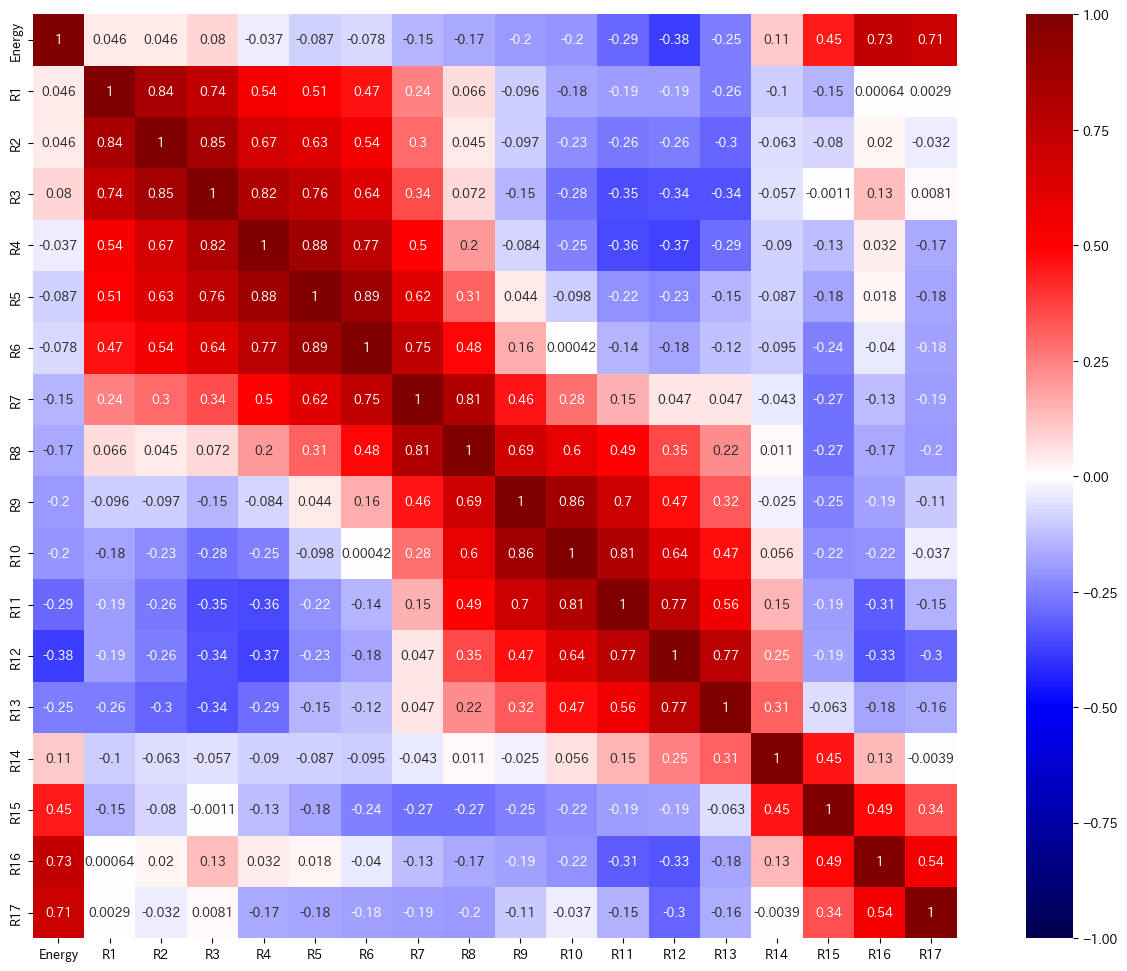

In [12]:
# データの分布を観察する：その2（相関行列）
correlation_coefficients = df_Target.corr()  # 相関行列の計算
# 相関行列のヒートマップ (相関係数の値あり)
plt.rcParams['font.size'] = 9
plt.figure(figsize=(18, 12))  # この段階で画像のサイズを指定する
sns.heatmap(correlation_coefficients, vmax=1, vmin=-1, cmap='seismic', square=True, annot=True, xticklabels=1, yticklabels=1)
plt.xlim([0, correlation_coefficients.shape[0]])
plt.show()

# **STEP4：PCAによる次元圧縮**

In [13]:
from sklearn.decomposition import PCA  # PCA用ライブラリをインポート
# k次元に圧縮したい場合、n_components = k と指定する。
pca = PCA(n_components=2)
pca.fit(df_dist)

PCA(n_components=2)

In [14]:
# 寄与率（表現できる情報量の割合）を計算する
contribution_ratios = pd.DataFrame(pca.explained_variance_ratio_)
contribution_ratios.rename(index={0:'第1主成分',1:'第2主成分'}).rename(columns={0:'寄与率'})

,寄与率
第1主成分,0.626037
第2主成分,0.188912


In [15]:
#ローディングベクトル(第n主成分に対する各説明変数の重み)を表示する
#第1主成分は0.672×R17 + 0.667×R16 + 0.312×R15 +…  で表されると読み取れる
loadings = pd.DataFrame(pca.components_.T, index=df_dist.columns)
loadings.rename(columns={0:'第1主成分',1:'第2主成分'})

,第1主成分,第2主成分
R1,-0.001049,0.006240
R2,-0.000837,-0.000841
R3,0.002909,-0.005820
R4,-0.003799,-0.010028
R5,-0.004749,-0.008687
R6,-0.006807,-0.003715
R7,-0.010022,0.001050
R8,-0.012296,0.002731
R9,-0.012298,0.014795
R10,-0.011553,0.025421


#**STEP5：データの散布図の描画**

横軸を第1主成分軸、縦軸を第2主成分軸とする散布図を描く。

In [16]:
# 主成分得点(スコア)を計算
# 各サンプルが各主成分軸上のどの座標に位置するかを表す値
score = pd.DataFrame(pca.transform(df_dist), index=df_dist.index)

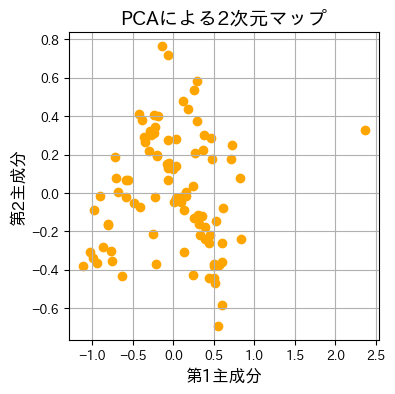

In [17]:
plt.figure(figsize=(4,4))  #図のサイズを指定
plt.scatter(score.iloc[:, 0], score.iloc[:, 1], c="orange")  #各サンプルの横軸・縦軸を指定（色などの詳細も指定可）
plt.title("PCAによる2次元マップ", fontsize=14)   #タイトルを指定
plt.xlabel('第1主成分', fontsize=12)       #横軸の詳細を指定
plt.ylabel('第2主成分', fontsize=12)       #縦軸の詳細を指定
plt.grid()      #()の中にFalseを書くと補助線を消せる
plt.show()

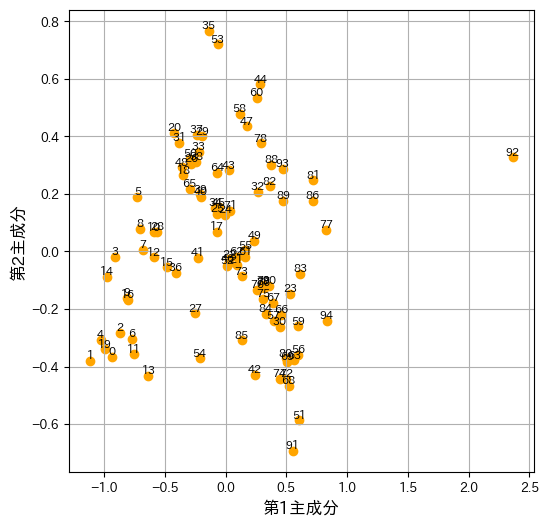

In [18]:
# プロットしたデータにサンプル名を書き込む
plt.figure(figsize=(6,6))
plt.scatter(score.iloc[:,0], score.iloc[:,1],c='orange')
plt.rcParams["font.size"] = 8
num = len(df_dist)
for i in range(num):
    plt.text(score.iloc[i,0], score.iloc[i,1], score.index[i], horizontalalignment="center", verticalalignment="bottom")
plt.xlabel('第1主成分', fontsize=12)
plt.ylabel('第2主成分', fontsize=12)
plt.grid()
plt.show()

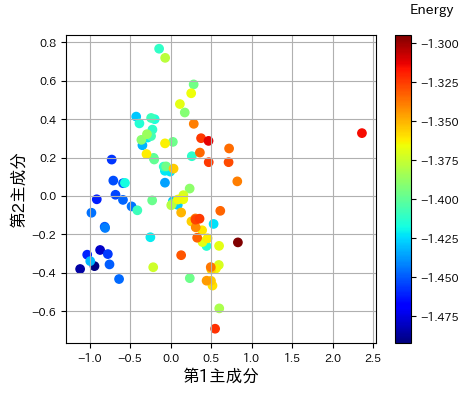

In [19]:
#『Energy』の値に応じて色分けする
plt.figure(figsize=(5,4))
plt.scatter(score.iloc[:, 0], score.iloc[:, 1], c=df['Energy'], cmap=plt.get_cmap('jet'))
clb = plt.colorbar()
clb.set_label('Energy', labelpad=-20, y=1.1, rotation=0, fontsize=10)
plt.xlabel('第1主成分', fontsize=12)
plt.ylabel('第2主成分', fontsize=12)
plt.grid()
plt.show()